<a href="https://colab.research.google.com/github/SLAA1234/AI-Project/blob/master/AI_project_Clustering_Lisa_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster

In this project I create models to cluster the customers of Mall. The result shows both Hierarchical Cluster model and K-means model perform good on customer segmentation. In Hierarchical Cluster model number of clusters is found by plotting dendogram, while in K-means model is find by elbow method. 

One of reasons that the hierarchical model performs also good in this project is the database used in this project is small. The dataset I download from Kaggle, https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python. The dataset includes 200 cases, each cases include 5 attributes, which are listed in Prepare Data section. While in this project I only use 2 attributes, that is, Aunual Income and Spending Score. 

One of the reasons I find K easily in K-means model is that the elbow method shows obvious elbow, so in the cluster visualization part it shows five distinct clusters.

At the end I explain why I use these two models in this project.

# Import Necessary Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Prepare Data

### load data

In [84]:
# upload local csv file to colab

from google.colab import  files

uploaded = files.upload()

Saving customers.csv to customers (3).csv


In [85]:
# import data into a dataframe
df = pd.read_csv("customers.csv")

### check data

In [86]:
# confirm the data is loaded
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# check if there is NaN values in training set
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [88]:
# check dataset shape
df.shape

(200, 5)

### addtional data preparation

In [89]:
# get the column 
df = df.iloc[:, 3:5]
df.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [90]:
# change datafram to numpy values
data = df.values
data.shape

(200, 2)

### data distribution

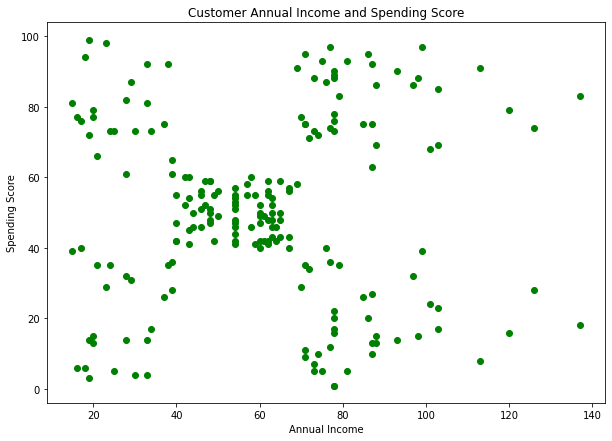

In [91]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c='green')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Annual Income and Spending Score')
plt.show()

# Hierarchical Cluster model

### plot dendogram

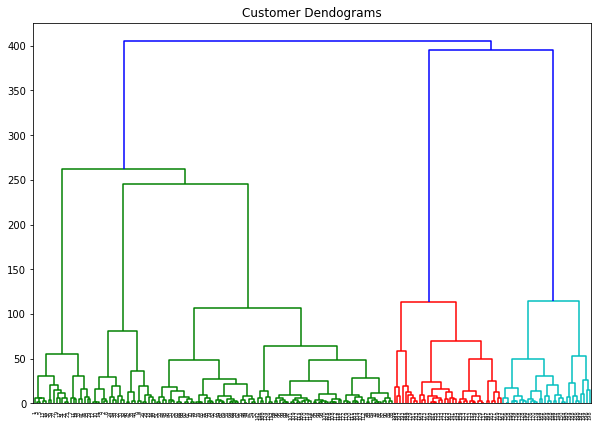

In [92]:
# plot dendogram to find number of clusters. Result shows data can be divided in 5 clusters.
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

### build model

In [93]:
# group data points into 5 clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

### predict cluster labels 

In [94]:
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### cluster visualization

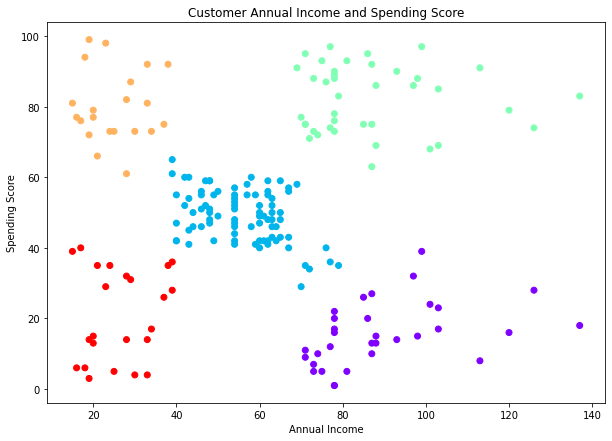

In [95]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Annual Income and Spending Score')
plt.show()

# K-Means Model

### find K values

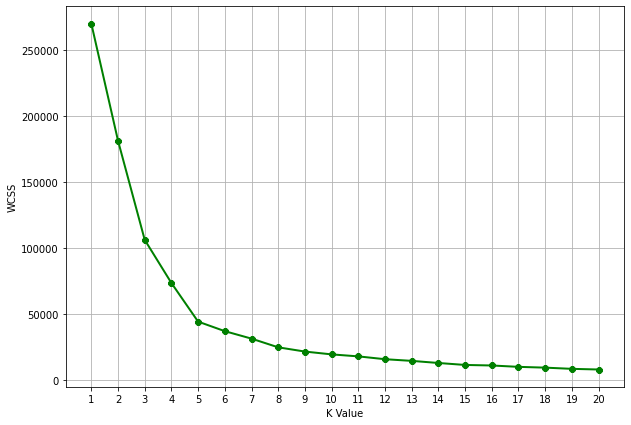

In [96]:
# use elbow method to find K. Result shows the elbow appears when x=5.

wcss = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))    
plt.grid()
plt.plot(range(1,21),wcss, linewidth=2, color="green", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

### build model

In [97]:
# 5 is the number of clusters
km = KMeans(n_clusters=5)

### predict cluster labels

In [98]:
clusters = km.fit_predict(df)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### cluster visualization

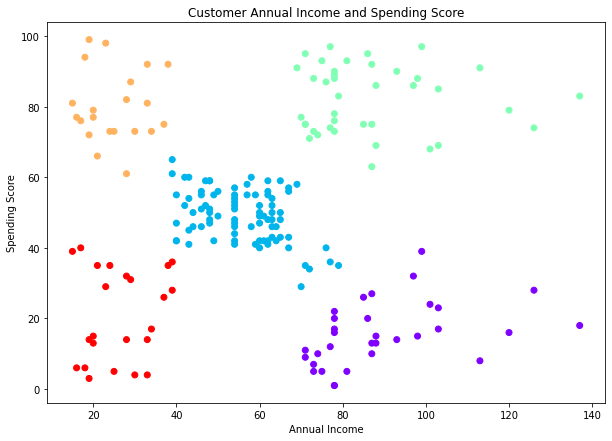

In [99]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Annual Income and Spending Score')
plt.show()

# Summary
Result shows both hierarchical cluster model and k-means model perform good on customer segmentation in this project. Plotting dendogram shows 5 clusters, meanwhile the elbow method gives same result.

Usually K-value is not easy to predict. But in this project elbow method shows clearly elbow value. So K-means model is suitable to this case.

Hierarchical clustering requires more on computation and storage, so it is more suitable for small data handling. In this project, dataset only includes 200 cases. So hierarchical culstering model is also suitable.
